## Повышение выручки
В распоряжении данные от интернет магазина:
- гипотезы с оцененными параметрами;
- файл визитов;
- файл заказов.

Необходимо:
- Приоритизировать гипотезы;
- Проанализировать результаты A/B-теста.

[Часть 1. Приоритизация гипотез.](#step1)

[Часть 2. Анализ A/B-теста.](#step2)
- [Кумулитивная выручка по группам.](#cum_revenue_by_groups)
- [Кумулятивное среднее чека по группам.](#mean_check_by_groups)
- [Относительное изменения кумулятивного среднего чека.](#Change_cum_mean_check)
- [Кумулятивная конверсия по группам.](#cum_conversion_by_gr)
- [Oтносительноe изменениe кумулятивной конверсии.](#rel_cum_conversion_by_gr)
- [Количество заказов по пользователям.](#count_orders_by_users)
- [Стоимость заказов.](#cost_order)
- [Статистическая значимость различий конверсий.](#significance_conversion)
- [Статистическая значимость различий средних чеков.](#significance_mean_check)

[Часть 3. Общий вывод](#conclusion)

## Часть 1. Приоритизация гипотез. <a name="step1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option('display.max_colwidth', -1)

In [2]:
hypothesis_df = pd.read_csv('/datasets/hypothesis.csv')
hypothesis_df.info()
hypothesis_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Таблица состоит из следующих столбцов:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Дубликатов не обнаружено, пропуски отстутствуют.

In [3]:
hypothesis_df['ICE'] = hypothesis_df['Impact'] * hypothesis_df['Confidence'] / hypothesis_df['Efforts']
hypothesis_df[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [4]:
hypothesis_df['RICE'] = hypothesis_df['Reach'] * hypothesis_df['Impact'] * hypothesis_df['Confidence'] \
/ hypothesis_df['Efforts']
hypothesis_df[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Умножив на показатель охвата приоритеты могли поменяться, что и произошло, показатели ICE у пяти гипотез отличаются менее чем в 2.315 раза, и умножение на показатель Reach лишь перемешало гипотезы в верхнем топ 5, но так как гипотезы с большими охватами имели большое значение ICE вклад именно этого параметра оказался существенным, меняющим порядок приоритетов.

## Часть 2. Анализ A/B-теста <a name="step2"></a>

In [5]:
orders_df = pd.read_csv('/datasets/orders.csv')
orders_df['date'] = pd.to_datetime(orders_df['date'])

orders_df.info()
print(f'{orders_df.duplicated().sum()} - количество дубликатов')
orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
0 - количество дубликатов


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Таблица состоит из следующих столбцов:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Дубликатов не обнаружено, пропуски отстутствуют. Тип данных столбца с датой изменен для дальнейшего удобства.

In [6]:
visits_df = pd.read_csv('/datasets/visitors.csv')
visits_df['date'] = pd.to_datetime(visits_df['date'])

visits_df.info()
print(f'{visits_df.duplicated().sum()} - количество дубликатов')
visits_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
0 - количество дубликатов


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Таблица состоит из следующих столбцов:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Дубликатов не обнаружено, пропуски отстутствуют. Тип данных столбца с датой изменен для дальнейшего удобства.

In [7]:
datesGroups = orders_df[['date','group']].drop_duplicates() 

# Выделение кумулятивной суммы визитов по группам и датам
visitorsAggregated = datesGroups.apply(lambda x: visits_df[np.logical_and(visits_df['date'] <= x['date'],
    visits_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])

# Выделение кумулятивной суммы дохода, числа покупок по группам и датам
ordersAggregated = datesGroups.apply(lambda x: orders_df[np.logical_and(orders_df['date'] <= x['date'],
                                                                     orders_df['group'] == x['group'])]\
                                .agg({'date' : 'max', 'group' : 'max', 'revenue' : 'sum', 'transactionId' 
                          : pd.Series.nunique}), axis=1).sort_values(by=['date','group']) 

# Агрегирование данных о покупках и визитов
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData = cumulativeData.rename(columns = {'transactionId' : 'count_orders', 'visitors': 'count_visitors'})
cumulativeData['conversion'] = round(cumulativeData['count_orders'] / cumulativeData['count_visitors'], 5)

# Выделение данных по отдельным группам
cumulativeA = cumulativeData[cumulativeData['group']=='A']
cumulativeB = cumulativeData[cumulativeData['group']=='B']

cumulativeData.head()

,date,group,revenue,count_orders,count_visitors,conversion
0,2019-08-01,A,148579,24,719,0.03338
1,2019-08-01,B,101217,21,713,0.02945
2,2019-08-02,A,242401,44,1338,0.03288
3,2019-08-02,B,266748,45,1294,0.03478
4,2019-08-03,A,354874,68,1845,0.03686


Функции для построения графиков двух групп и их отношений 

In [8]:
def draw_graphic_two_groups(boundary_y, ylabel, title, y_values):
    plt.figure(figsize=(9,4))
    plt.plot(cumulativeA['date'], y_values[0], label='A')
    plt.plot(cumulativeB['date'], y_values[1], label='B')
    plt.axis(["2019-08-01", '2019-08-31', 0, boundary_y]) 

    plt.xlabel('Дата')
    plt.ylabel(ylabel)
    plt.title(title)

    plt.grid()
    plt.legend();

In [9]:
def draw_graphic_relative(axis_coordinate, ylabel, title, y_values):
    plt.figure(figsize=(9,4))
    plt.plot(mergedCumulative['date'], y_values)
    plt.axis(["2019-08-01", '2019-08-31', -1, 1]) 
    plt.axhline(y=axis_coordinate, color='black', linestyle='--', label=f'у = {axis_coordinate}') 

    plt.xlabel('Дата')
    plt.ylabel(ylabel)
    plt.title(title)

    plt.grid()
    plt.legend();

### Кумулятивная выручка по группам. <a name='cum_revenue_by_groups'></a>

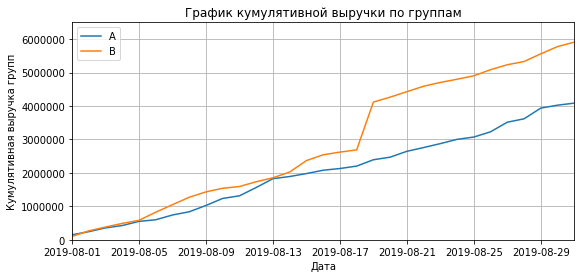

In [10]:
draw_graphic_two_groups(6500000, 'Кумулятивная выручка групп', 'График кумулятивной выручки по группам',
              [cumulativeA['revenue'],cumulativeB['revenue']])

#### Выводы:
- Кумулятивная выручка группы В больше выручки группы А;
- Не было не единого дня без продаж не в единой группе.

#### Предположения:
- В период 18, 19 августа клиенты группы В совершили крупные покупки;
- Кумулятивные выручки двух групп за исключением аномалий в группе В схожи.

### Кумулятивное среднее чека по группам. <a name='mean_check_by_groups'></a>

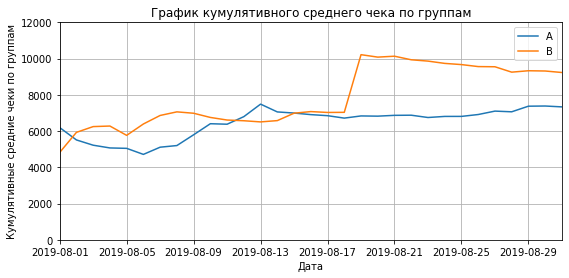

In [11]:
draw_graphic_two_groups(12000, 'Кумулятивные средние чеки по группам', 'График кумулятивного среднего чека по группам',
              [cumulativeA['revenue'] / cumulativeA['count_orders'], cumulativeB['revenue'] /  cumulativeB['count_orders']])

#### Выводы:
- Кумулятивный средний чек группы В больше группы А;
- После 18 августа средний чек группы В падает, A растёт;
- В период 18, 19 августа клиенты группы В совершили крупные покупки;
- 3 - 7 августа в группе А уменьшился средний чек. 

#### Предположения:
- Без аномалий в группе В после 17 августа средний чек группы В остается стабильным;
- Есть взаимосвязь между ростом среднего чека одной группы и одновременным падением в другой после удаления аномальных дней.

### Относительное изменения кумулятивного среднего чека. <a name = 'Change_cum_mean_check'></a>

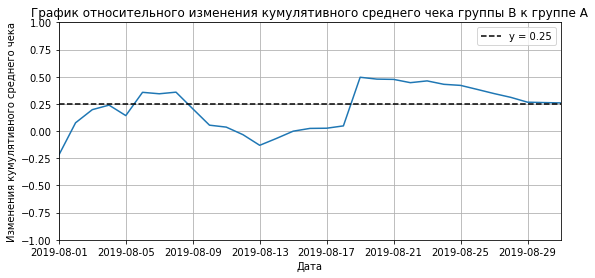

In [12]:
mergedCumulative = cumulativeA.merge(cumulativeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
draw_graphic_relative(0.25, 'Изменения кумулятивного среднего чека',
                      'График относительного изменения кумулятивного среднего чека группы B к группе A',
                     (mergedCumulative['revenueB']/mergedCumulative['count_ordersB']) \
    /(mergedCumulative['revenueA']/mergedCumulative['count_ordersA'])-1)

#### Выводы:
- Имеются кратковременные промежутки, где кумулятивное среднее группы В стремительно растёт;
- Подавляющую длительность времени кумулятивный средний чек группы В выше группы А;
- Имеются некоторое число крупных заказов 2, 6, 19 августа в группе В.

#### Предположения:
- Существует некоторая периодичность в падениях кумулятивного среднего чека группы В к группе А, при этом длительность первого такого падения в два раза меньше повторного;
- Аномально большие заказы имеются только в группе В.

### Кумулятивная конверсия по группам <a name='cum_conversion_by_gr'></a>

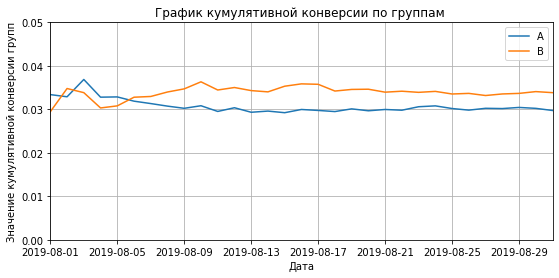

In [13]:
draw_graphic_two_groups(0.05, 'Значение кумулятивной конверсии групп', 'График кумулятивной конверсии по группам ',
              [cumulativeData.query('group == "A"')['conversion'], cumulativeData.query('group == "B"')['conversion']])

#### Выводы:
- Кумулятивная конверсия в обеих группах стабильна;
- Кумулятивная конверсия в группе В на шестой день А В теста стала превосходить значения в группе А и оставшееся время теста была постоянна выше кумулятивной конверсии в группе А.

#### Предположения:
- Влияние величины кумулятивной конверсии в одной группе на значение в другой группе отсутствует;
- Влияние фактора даты на величину конверсии минимально.

### Oтносительноe изменениe кумулятивной конверсии. <a name='rel_cum_conversion_by_gr'></a>

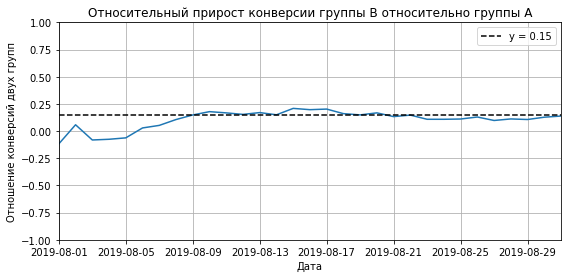

In [14]:
draw_graphic_relative(0.15,'Отношение конверсий двух групп',
                      'Относительный прирост конверсии группы B относительно группы A',
                     mergedCumulative['conversionB']/mergedCumulative['conversionA']-1)

#### Выводы:
- Конверсия в группе В стала больше конверсии в группе А 6 августа и такое соотношение сохраняется с изменением в относительном отношении на 0.1 раза. 

#### Предположения:
- Конверсия нормализовалось и если метрика оценка тестирования - конверсии тест можно прекращать, однако необходимо рассмотреть отношение конверсий двух групп без выбросов. 

### Количество заказов по пользователям <a name='count_orders_by_users'></a>

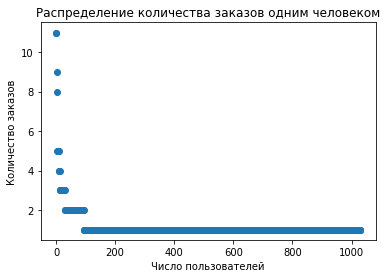

In [15]:
count_orders_by_user = orders_df['visitorId'].value_counts()
x_values = pd.Series(range(0,len(count_orders_by_user)))
plt.scatter(x_values, count_orders_by_user)

plt.xlabel('Число пользователей')
plt.ylabel('Количество заказов')
plt.title('Распределение количества заказов одним человеком');

In [16]:
print(np.percentile(count_orders_by_user, [95, 99])) 
print(f'{sum(count_orders_by_user > 4)} - Количество посетителей, купивших за рассматриваемый период более 4 раз')
print(f'{sum(count_orders_by_user > 2) / len(count_orders_by_user):.2%} - Процент пользователей, совершивших более 2 заказов')
print(f'{sum(count_orders_by_user > 1) / len(count_orders_by_user):.2%} - Процент пользователей, совершивших более 1 заказов')

[2. 4.]
10 - Количество посетителей, купивших за рассматриваемый период более 4 раз
2.91% - Процент пользователей, совершивших более 2 заказов
9.12% - Процент пользователей, совершивших более 1 заказов


#### Выводы:
- Считаю, что отказаться от 2.91 процентов пользователей, как аномальных - допустимо и поступаю именно так;
- Лишь 9.12% пользователей совершили более одного заказа;
- Лишь 10 посетителей интернет магазина купили более 4 раз за наблюдаемый временной отрезок.

#### Предположения:
- Покупки из предлагаемого модельного ряда интересовали подавляющее число покупателей лишь единожды за время теста. 

### Стоимость заказов. <a name='cost_order'></a>

2 - заказa на более чем 100000


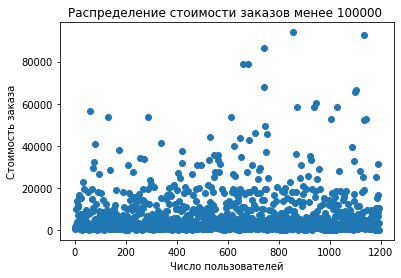

In [17]:
print('{} - заказa на более чем 100000'.format(orders_df.query('revenue > 100000')['date'].count()))
x_values = pd.Series(range(0,len(orders_df.query('revenue < 100000')['revenue'])))
plt.scatter(x_values, orders_df.query('revenue < 100000')['revenue'])

plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказа')
plt.title('Распределение стоимости заказов менее 100000 ');

In [18]:
print(np.percentile(orders_df['revenue'], [95, 99])) 
print('{} - Количество посетителей, купивших более чем на 60000'.format(sum(orders_df['revenue'] > 60000)))

orders_df['revenue'].describe()
print('{:.2%} - Процент посетителей, купивших менее чем на 10000'.format(sum(orders_df['revenue'] < 10000)/len(orders_df)))

[28000.  58233.2]
11 - Количество посетителей, купивших более чем на 60000
79.62% - Процент посетителей, купивших менее чем на 10000


Отдельному рассмотрению подлежит два заказа более 100000, они были удалены из набора стоимости заказов, чтобы добиться лучше детализации стоимостей.

#### Выводы:
- Лишь 5% пользователей совершили заказ более чем на 28000 - считаю эту границу для аномальных стоимостей заказов оптимальной;
- Лишь 11 посетителей интернет магазина купили более чем на 60000.

#### Предположения:
- Специальные предложения для заказов менее 10000 будут воздействовать на 80% аудитории интернет магазина, что может положительно сказаться на количестве таких заказов.

### Статистическая значимость различий конверсий. <a name='significance_conversion'></a>

#### Гипотезы

Нулевая гипотеза - конверсии с точки зрения средних значений в группе А и В равны. Альтернативная - средние значения конверсий в двух группах различны.

Функции для вывода о гипотезах, сравнения конверсий двух групп. 

In [19]:
def conclusion_about_hypothesis(groupA, groupB, hypothesis):
    p_val = stats.mannwhitneyu(groupA, groupB)[1]
    
    if p_val < 0.05:
        print(f'p-value {p_val:.5f} < 0.05 значит отвергаем гипотезу о {hypothesis}')
    else:
        print(f'p-value {p_val:.5f} > 0.05 значит не отвергаем гипотезу о {hypothesis}')

In [20]:
def compare_conversion(df, hypothesis):
    
    # Получение количества заказов по группам 
    ordersByUsersA = df[df['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
    ordersByUsersA.columns = ['visitorId', 'orders']

    ordersByUsersB = df[df['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
    ordersByUsersB.columns = ['visitorId', 'orders']

    # Получение столбцов заказов по визитам, группам
    sample_B = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange
        (mergedCumulative.loc[30, 'count_visitorsB']- len(ordersByUsersB['orders'])), name='orders')],axis=0) 
    
    sample_A = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange
        (mergedCumulative.loc[30, 'count_visitorsA'] - len(ordersByUsersA['orders'])), name='orders')],axis=0) 

    conclusion_about_hypothesis(sample_A, sample_B, hypothesis)
    
    print("{0:.2%} - процент на который конверсия группы В больше, чем в группе А"
      .format(sample_B.mean() / sample_A.mean()-1)) 

In [21]:
anomaly_count_order_vis_id = orders_df.groupby('visitorId')['visitorId'].count() \
    [(orders_df.groupby('visitorId')['visitorId'].count() > 2)].index

orders_without_anomaly = orders_df[np.logical_and(orders_df['revenue'] < 28000,
                                np.logical_not(orders_df['visitorId'].isin(anomaly_count_order_vis_id)))]

In [22]:
compare_conversion(orders_df, 'равенстве конверсий в двух группах с "сырыми" данными')

p-value 0.00840 < 0.05 значит отвергаем гипотезу о равенстве конверсий в двух группах с "сырыми" данными
13.81% - процент на который конверсия группы В больше, чем в группе А


In [23]:
compare_conversion(orders_without_anomaly, 'равенстве конверсий в двух группах с очищенными данными')

p-value 0.00680 < 0.05 значит отвергаем гипотезу о равенстве конверсий в двух группах с очищенными данными
17.23% - процент на который конверсия группы В больше, чем в группе А


#### Выводы:
- В двух исследуемых группах конверсии не равны;
- Удаление аномалий добавило уверенности в не равенстве конверсий двух групп.

#### Предположения:
- Изменение, тестировавшиеся при помощи А/В теста положительно отразится на прибыли компании.

### Статистическая значимость различий средних чеков. <a name='significance_mean_check'></a>

#### Гипотезы

Нулевая гипотеза - средний чек в группе А и В равны. Альтернативная - средний чек в двух группах различен.

In [24]:
revenue_orders_df_group_A = orders_df[orders_df['group']=='A']['revenue']
revenue_orders_df_group_B = orders_df[orders_df['group']=='B']['revenue']

conclusion_about_hypothesis(revenue_orders_df_group_A,revenue_orders_df_group_B, 
                           'равенстве средних чеков в двух группах с "сырыми" данными')
print("{0:.2%} - процент на который средний доход группы В больше дохода группы А"
      .format(revenue_orders_df_group_B.mean()/revenue_orders_df_group_A.mean()-1)) 

p-value 0.36465 > 0.05 значит не отвергаем гипотезу о равенстве средних чеков в двух группах с "сырыми" данными
25.87% - процент на который средний доход группы В больше дохода группы А


In [25]:
revenue_orders_without_anomaly_gr_A = orders_without_anomaly[orders_without_anomaly['group']=='A']['revenue']
revenue_orders_without_anomaly_gr_B = orders_without_anomaly[orders_without_anomaly['group']=='B']['revenue']

conclusion_about_hypothesis(revenue_orders_without_anomaly_gr_A, revenue_orders_without_anomaly_gr_B, 
                           'равенстве средних чеков в двух группах с очищенными данными')

print("{0:.2%} - процент на который средний доход группы А больше дохода группы В"
      .format(revenue_orders_without_anomaly_gr_A.mean()/revenue_orders_without_anomaly_gr_B.mean()-1)) 

p-value 0.34536 > 0.05 значит не отвергаем гипотезу о равенстве средних чеков в двух группах с очищенными данными
2.79% - процент на который средний доход группы А больше дохода группы В


#### Выводы:
- Подтвердилось предположение о равенстве средних чеков без выбросов;
- Выбросы влияли на отношение средних чеков, однако влияние на вывод о равенстве чеков минимально;
- Изменение, тестировавшиеся при помощи А/В теста положительно отразилось на прибыли компании.

## Часть 3. Общий вывод <a name='conclusion'></a>

Остановить тест, зафиксировать, что тестируемая гипотеза В при внедрении будет приносить компании прибыль больше, чем имеется сейчас, такое решение принято за счёт пунктов ниже, которые были подтверждены в ходе тестирования:
- Стабилизации относительного прироста конверсии и среднего чека по группам;
- Роста конверсии в группе В относительно А;
- Стабильного, равного размера среднего чека в обеих группах.



Во время проведения А/В теста были сделаны следующие наблюдения:
- Наиболее типичный медианный чек заказа около 3000; 
- Наибольшее число покупателей совершили лишь 1 покупку за наблюдаемый месяц, то есть либо модельный ряд предполагает не частые покупки, либо аудиторию что-то не устроило;
- Было выявлено два аномальных заказа, которые составили существенную часть суммарного дохода компании, и вне А/В теста можно было бы рассмотреть, что отличает эти заказы от других;
- Любопытная особенность, наблюдаемая во время теста - существует некоторая периодичность в падениях кумулятивного среднего чека группы В к группе А, при этом длительность первого такого падения в два раза меньше повторного.